In [46]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)
import mpl_toolkits.basemap as bmp
import matplotlib.pyplot as plt
import csv

Populating the interactive namespace from numpy and matplotlib


In [39]:
m = bmp.Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
plt.figure(figsize=(19,20))

In [87]:
lon = []
lat = []
rad = []
seen = dict()
with open('data/raw_calc_lat_lon.csv', 'r') as csvfile:
    tab = csv.reader(csvfile, delimiter=',')
    for row in tab:
        if row[1] != 'latitude':
            if row[0] not in seen:
                lat.append(float(row[1]))
                lon.append(float(row[2]))
                rad.append(float(row[3]) * 45)
                seen[row[0]] = True

In [78]:
# Number of tweets
opacity = [389, 15, 334, 51, 739, 329, 86, 8, 0, 453, 339, 31, 47, 73, 302, 206, 71, 91, 22, 8, 298,
           39, 9, 8, 30, 90, 10, 2, 5, 38, 122, 95, 96, 322, 0, 310, 140, 8, 62, 42, 123, 2, 164, 736, 65, 9,
           54, 13, 22, 97, 2,]

In [84]:
colors = np.zeros((51,4))
colors[:,2] = 1.0
colors[:,3] = np.array(opacity)/(2*float((max(opacity)))) + 0.5

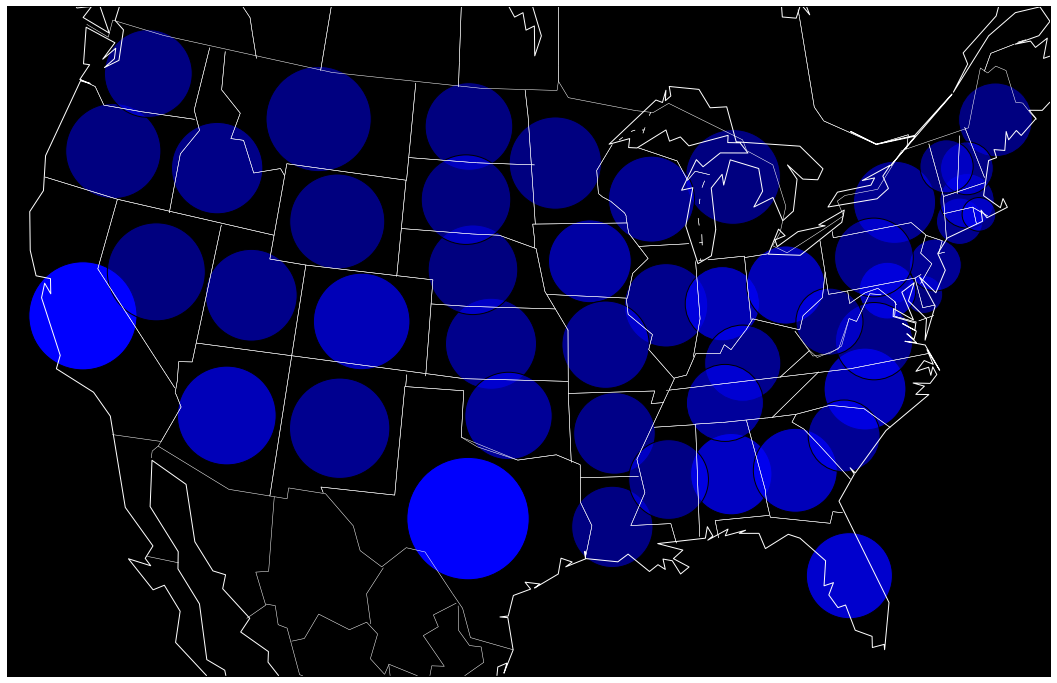

In [86]:
m.drawcoastlines(color='white')
m.drawstates(color='white')
m.drawcountries(color='white')
m.drawmapboundary(fill_color='black')

m.scatter(lon, lat, latlon=True, s=rad, c=colors)
plt.show()

In [88]:
plt.figure(figsize=(19,20))

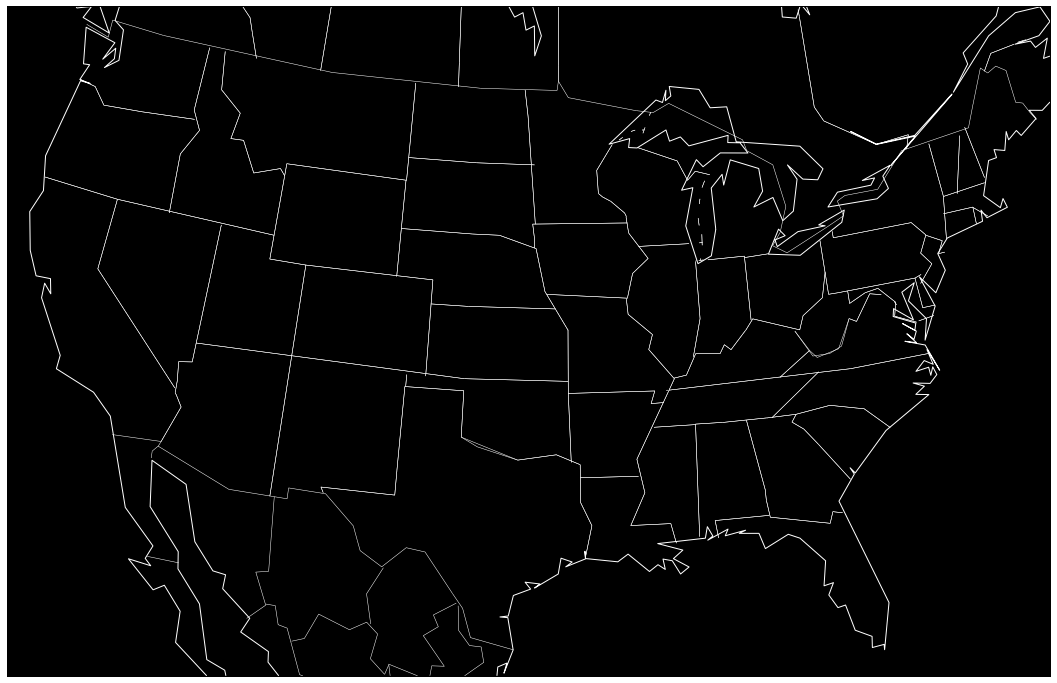

In [89]:
m.drawcoastlines(color='white')
m.drawstates(color='white')
m.drawcountries(color='white')
m.drawmapboundary(fill_color='black')

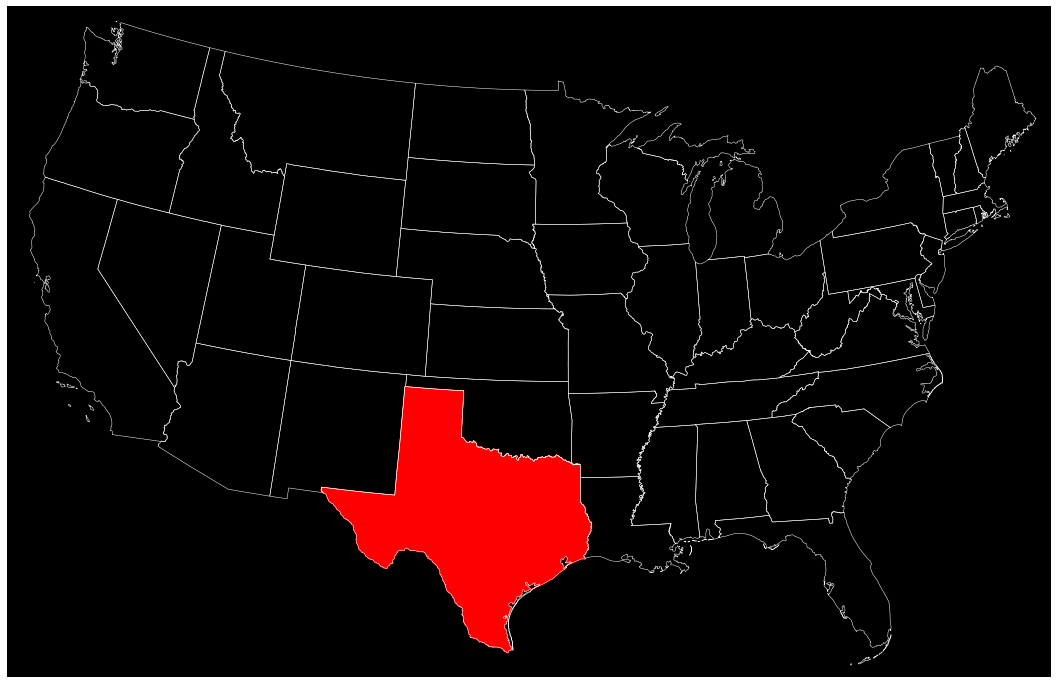

In [96]:
from matplotlib.patches import Polygon

# create the map
map = bmp.Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('state_shapes/st99_d00', name='states', color='white', drawbounds=True)

map.drawmapboundary(fill_color='black')
# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon
seg = map.states[state_names.index('Texas')]
poly = Polygon(seg, facecolor='red',edgecolor='red')
ax.add_patch(poly)

plt.show()